Importing libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Meta information about Dataframe

In [ ]:
print(f"number of rows:--> {df.shape[0]} and number of columns:--> {df.shape[1]}")

number of rows:--> 918 and number of columns:--> 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Missing values and Duplicate rows

In [ ]:
def checking_m(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

,Missing_Number,Missing_Percent
HeartDisease,0,0.0
ST_Slope,0,0.0
Oldpeak,0,0.0
ExerciseAngina,0,0.0
MaxHR,0,0.0
RestingECG,0,0.0
FastingBS,0,0.0
Cholesterol,0,0.0
RestingBP,0,0.0
ChestPainType,0,0.0


In [ ]:
# No missing values

In [ ]:
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 0


 Statistical information of Dataframe
 

In [ ]:
#check data description
df.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [ ]:
#check the correlation between target variable and each of the columns
df.corr()["HeartDisease"]

Age             0.282039
RestingBP       0.107589
Cholesterol    -0.232741
FastingBS       0.267291
MaxHR          -0.400421
Oldpeak         0.403951
HeartDisease    1.000000
Name: HeartDisease, dtype: float64

Visualize correlation of independent features and checking multicolinarity problems

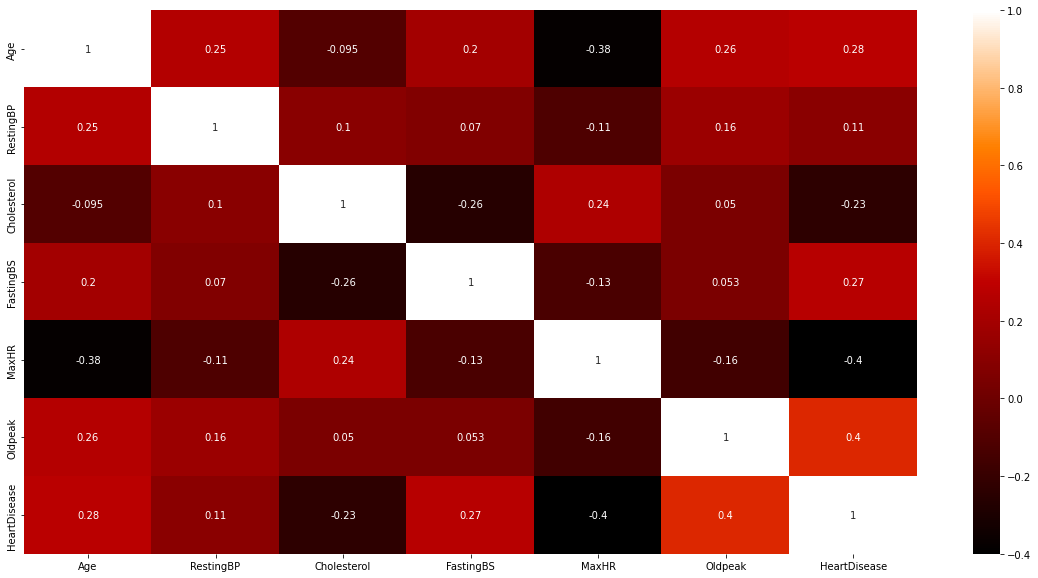

In [ ]:

plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="gist_heat")

In [ ]:
#with the function we can select highly correlated  independent features 
#it will remove the first feature that is correlated with anything other feature 
def correlation(df,threshold):
    coll_corr=set() #set of all the names of correlated columns 
    corr_matrix=df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname=corr_matrix.columns[i] #getting the name of columns
                coll_corr.add(colname)
    return coll_corr 

In [ ]:
#calling the fuction
corr_feature = correlation(df.iloc[:,:-1],0.85)
len(set(corr_feature))

0

In [ ]:
# No highly correalted features or multicolinarity problems

In [ ]:
#getting the categorical and numerical columns from df
numeric_col=[col for col in df if df[col].dtype !="object" ]
categorical_col=[col for col in df if df[col].dtype=="object" ]
numeric_col.remove("HeartDisease")
print("Numerical col:",numeric_col)
print("Categrical col:",categorical_col)

Numerical col: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
Categrical col: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


Find Outliers

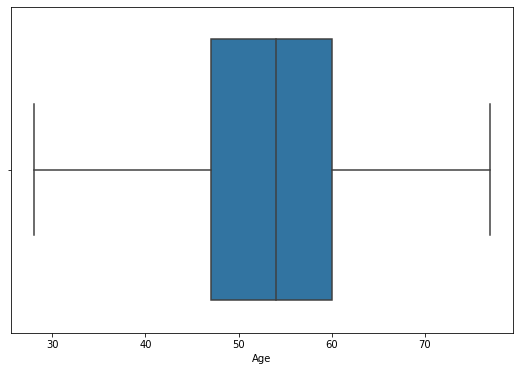

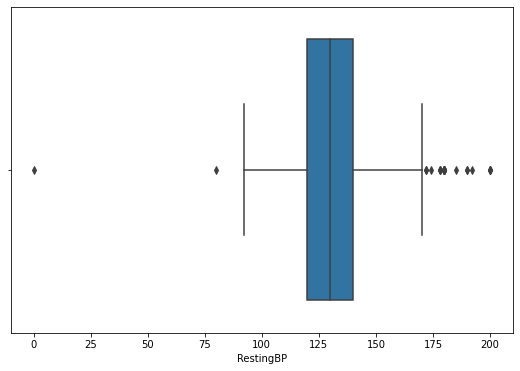

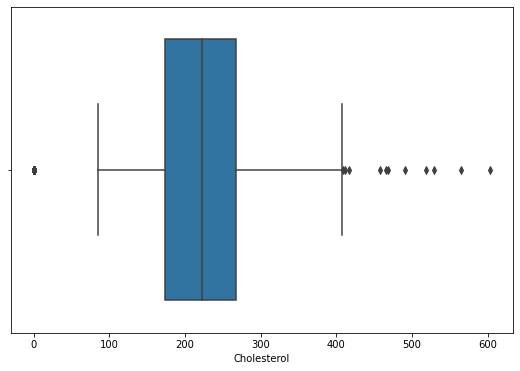

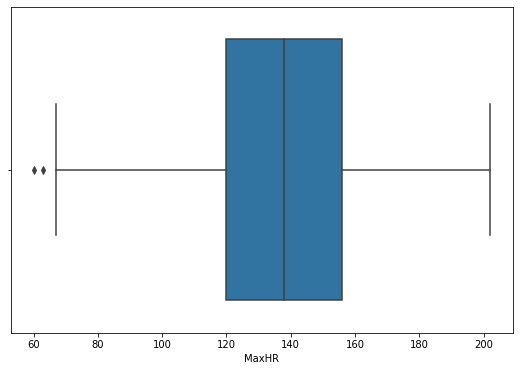

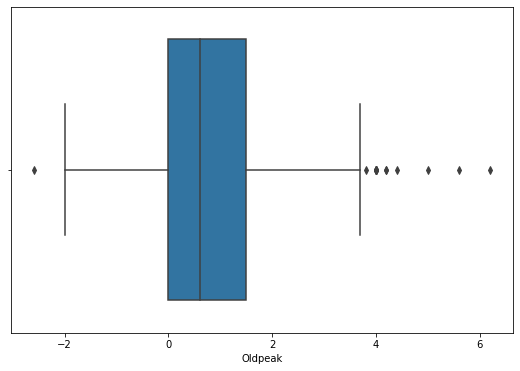

In [ ]:
col=['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
for c in col:
    fig=plt.figure(figsize=(9,6))
    sns.boxplot(x=df[c],hue=df.HeartDisease)

Removing Outliers Using IQR


In [ ]:
#Arrange the data in increasing order
sorted(col)

['Age', 'Cholesterol', 'MaxHR', 'Oldpeak', 'RestingBP']

In [ ]:
q1, q3= np.percentile(df['RestingBP'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)

lower_bound 90.0
upper_bound 170.0


In [ ]:
df = df[(df['RestingBP']>=90) & (df['RestingBP']<=170)]

In [ ]:
q1, q3= np.percentile(df['Oldpeak'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)

lower_bound -2.25
upper_bound 3.75


In [ ]:
df = df[(df['Oldpeak']>=-2) & (df['Oldpeak']<=3)]

In [ ]:
q1, q3= np.percentile(df['MaxHR'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)

lower_bound 66.0
upper_bound 210.0


In [ ]:
df = df[(df['MaxHR']>=66) & (df['MaxHR']<=210)]

In [ ]:
q1, q3= np.percentile(df['Cholesterol'],[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
print("lower_bound",lower_bound)
print("upper_bound",upper_bound)

lower_bound 38.125
upper_bound 401.125


In [ ]:
df = df[(df['Cholesterol']>=38) & (df['Cholesterol']<=401)]

# Data Visualization

In [ ]:
fig = px.histogram(df, 'Age',             
                   color="HeartDisease",histfunc="count",
                   title="<b>Age vs HeartDisease</b>")

fig.show()

From this plot we can note that heart disease is more prominent over people who's age range between 55 and 65

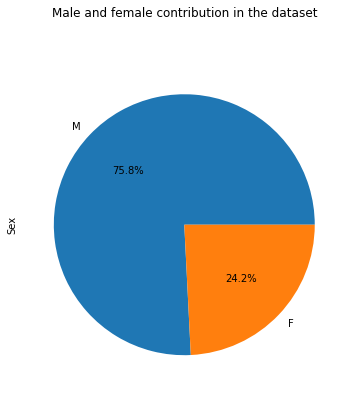

In [ ]:
sex=df.Sex.value_counts()
sex.plot(kind='pie',figsize=(15,6),autopct='%1.1f%%')
plt.title('Male and female contribution in the dataset', y=1.12) 
plt.show()

Note that the dataset is biased due to the unequal contribution wrt gender

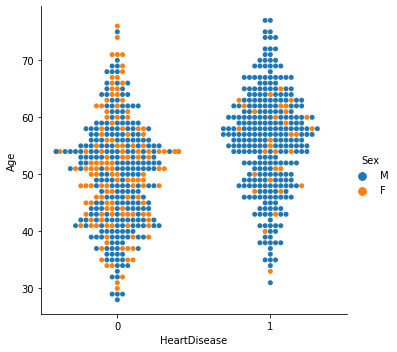

In [ ]:
sns.catplot(data=df, x="HeartDisease", y="Age", kind="swarm", hue="Sex")

Implies that males are more likely prone to heart disease especially in the age range of 50-60

In [ ]:
ChestPainType = df.ChestPainType.value_counts()

fig = px.pie(ChestPainType, 
             values = ChestPainType.values, 
             names = ChestPainType.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.update_layout(title_text='Chest Pain types')
fig.show()

Gives an overview of types and percentage of chest pains which contribute to the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



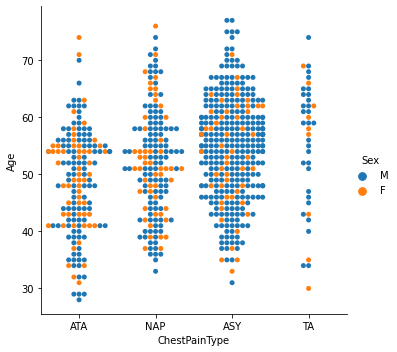

In [ ]:
sns.catplot(data=df, x="ChestPainType", y="Age", kind="swarm", hue="Sex")

Gives and insight into what types of chest pain is more prominent among people.

Also note that males get an unsual amount of ASY type of chest pain

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



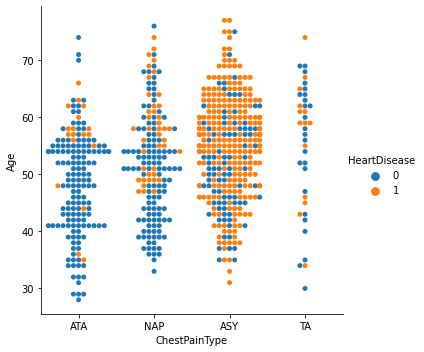

In [ ]:
sns.catplot(data=df, x="ChestPainType", y="Age", kind="swarm", hue="HeartDisease")

People with ASY type of chest pain have a high chance of getting a heart disease and a large portion of it lies in the age range above 50

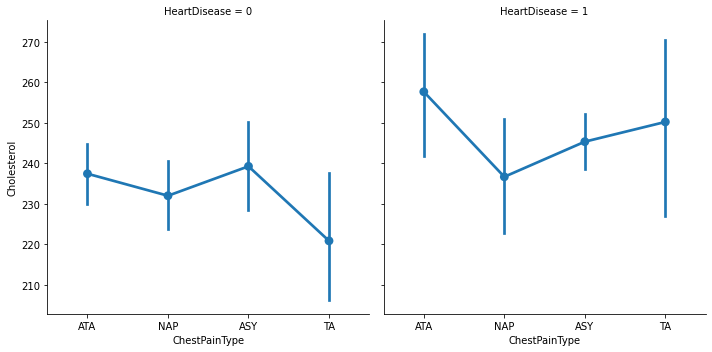

In [ ]:
sns.catplot(data = df , x ="ChestPainType"  , y ="Cholesterol", kind="point" , col ="HeartDisease" , ci =95)

Significant high colestorel levels in people with heart disease and note that there is a high difference in avg cholestorel level in different types of chest pain

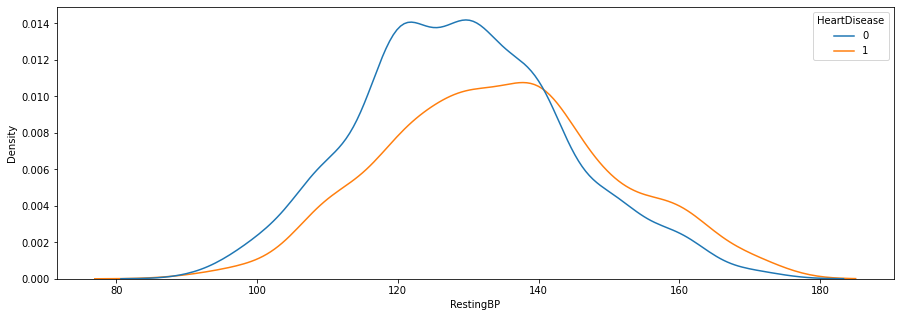

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['RestingBP'],hue=df['HeartDisease'])
plt.show()

Plot of density vs RestingBP

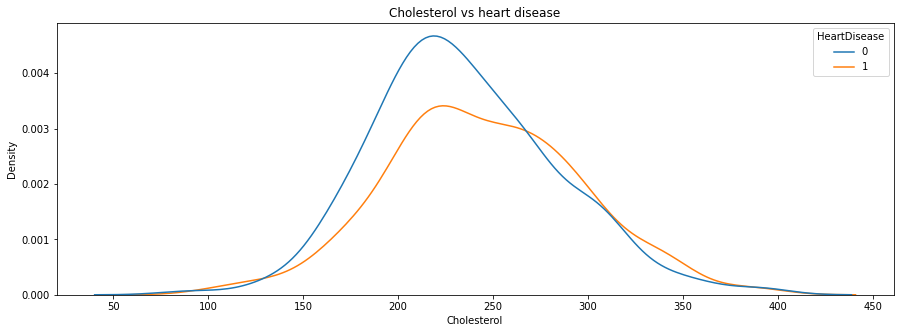

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['Cholesterol'],hue=df['HeartDisease'])
plt.title("Cholesterol vs heart disease")
plt.show()

Plot of density vs Cholesterol

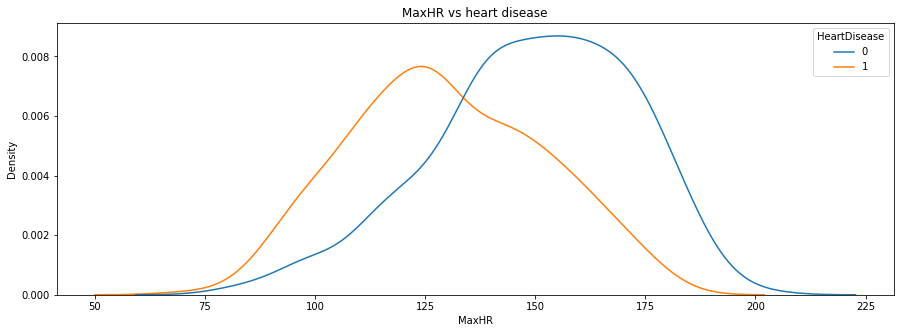

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['MaxHR'],hue=df['HeartDisease'])
plt.title("MaxHR vs heart disease")
plt.show()

People with lower MaxHR (i.e in range of 100-150) are more likely to get heart disease

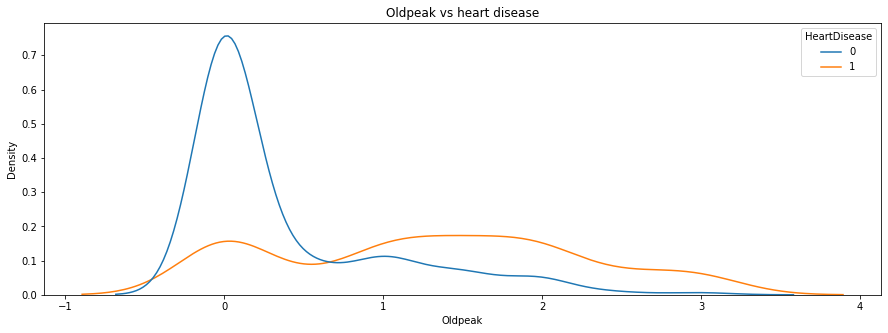

In [ ]:
plt.figure(figsize=(15,5))
sns.kdeplot(df['Oldpeak'],hue=df['HeartDisease'])
plt.title("Oldpeak vs heart disease")
plt.show()

Above plot says heart disease is affects the older people whose age is ranging between 55 and 65

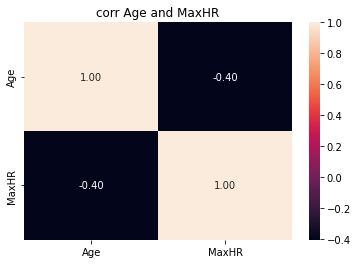

In [ ]:
sns.heatmap(df[["Age" , "MaxHR"]].corr(), annot=True , fmt =".2f")
plt.title("corr Age and MaxHR")
plt.show()

The heart rate and age seem to be negatively correlated

In [ ]:
fig = px.histogram(data_frame = df,
             x = "ExerciseAngina",
             color="HeartDisease", title="<b>ExerciseAngina vs HeartDisease</b>",
             template='plotly_dark', width=500,height=300)
fig.show()

Gives a count of people with heart disease while dividing wrt ExerciseAngina

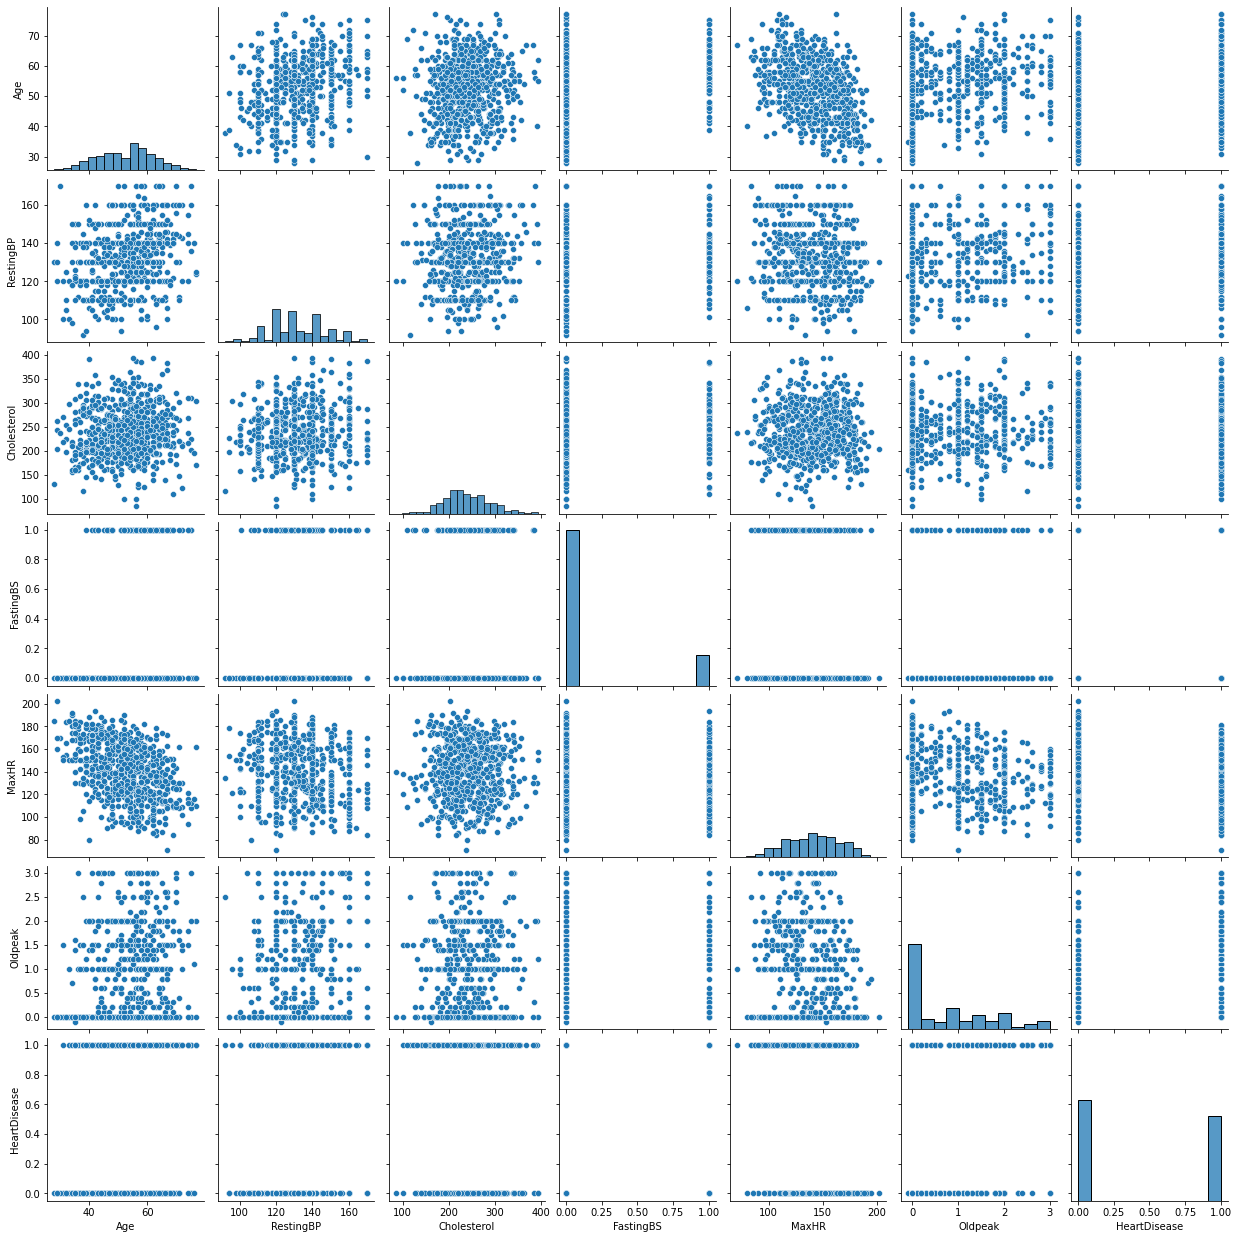

In [ ]:
sns.pairplot(df)

Correlation of every attribute with each other.